<a href="https://colab.research.google.com/github/arekangel/AI_AUTH_2025_Areklakis_Aggelos/blob/main/2h_ergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('water_potability.csv')#φορτώνω τα δεδομένα
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


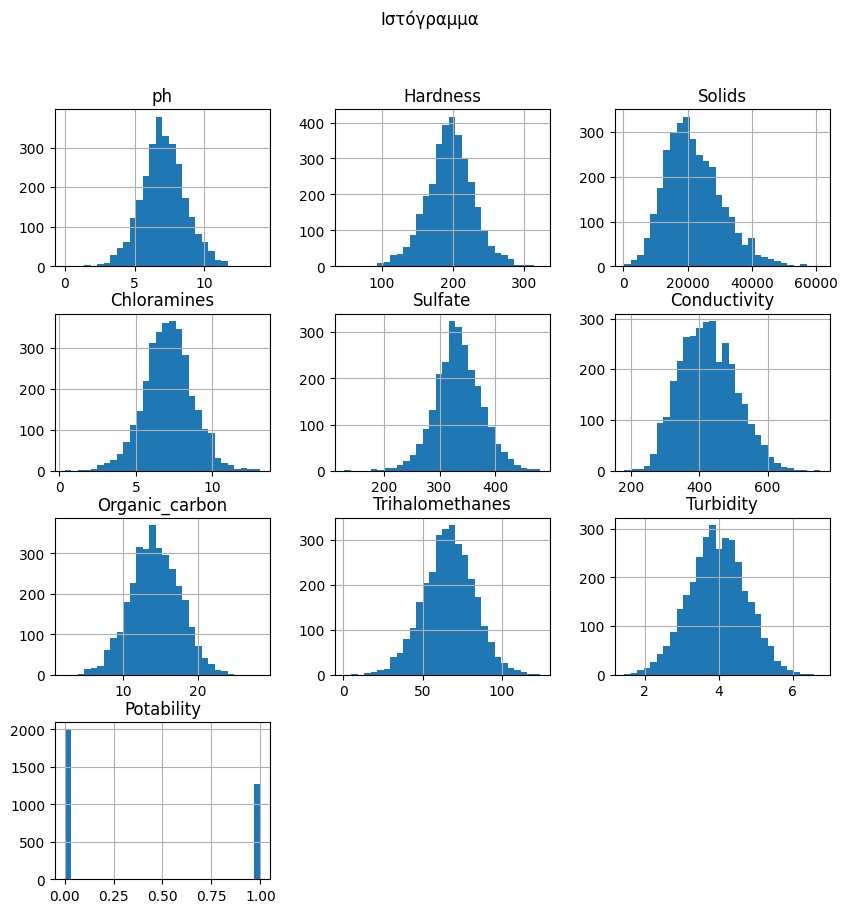

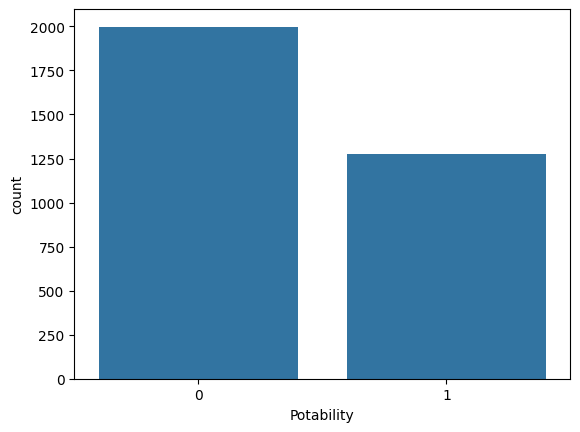

In [2]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,10),bins=30)
plt.suptitle("Ιστόγραμμα")#δημιουργω ιστογραμμα για κάθε δεδομένο
plt.show()
sns.countplot(x='Potability', data=df) #δημιουργώ ραβδόγραμμα για την μεταβλητή του Potability
plt.show()

In [3]:
missing_values=df.isnull().sum()#βρίσκω το άθροισμο για κάθε κατηγορία των κενών τιμών
print("the number of missing values are ",missing_values)
potability_values=df["Potability"].value_counts(normalize=True)
print("the number of potability values are ",potability_values)

the number of missing values are  ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
the number of potability values are  Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


In [ ]:
Θεωρώ ότι το ποσοστό του μη πόσιμου νερού είναι διπλάσιο απο το ποσοστό του πόσιμου άρα δεν είναι ικανοποιητική η ποιότητα των δεδομένων καθώς το μοντέλο δεν μπορεί να εκπαιδευτεί σωστά θα έχει προκατάληψη

In [4]:

df_clean_ph = df.dropna(subset=["ph"]).copy()#Αφαιρώ όλες τις κενές τιμές απο το ph
print(df_clean_ph.shape)

#φτιάχνω 3 μεταβλητές με τα υποσύνολα του ερωτήματος
low_ph=df_clean_ph[df_clean_ph["ph"]<6.5].shape[0]
good_ph=df_clean_ph[(df_clean_ph["ph"]>=6) & (df_clean_ph["ph"]<8.5)].shape[0]
high_ph=df_clean_ph[df_clean_ph["ph"]>=8.5].shape[0]




print("pH < 6.5:", low_ph)
print("6.5 ≤ pH ≤ 8.5:", good_ph)
print("pH > 8.5:", high_ph)


(2785, 10)
pH < 6.5: 968
6.5 ≤ pH ≤ 8.5: 1651
pH > 8.5: 489


In [5]:

low_ph=df_clean_ph[df_clean_ph["ph"]<6.5]
good_ph=df_clean_ph[(df_clean_ph["ph"]>=6) & (df_clean_ph["ph"]<8.5)]
high_ph=df_clean_ph[df_clean_ph["ph"]>=8.5]
#βρισκω για καθε έυρος τιμών το ποσοστό του
potability_values1=low_ph["Potability"].value_counts(normalize=True)
potability_values2=good_ph["Potability"].value_counts(normalize=True)
potability_values3=high_ph["Potability"].value_counts(normalize=True)

print("the number of potability values are ",potability_values1)
print("the number of potability values are ",potability_values2)
print("the number of potability values are ",potability_values3)

the number of potability values are  Potability
0    0.632231
1    0.367769
Name: proportion, dtype: float64
the number of potability values are  Potability
0    0.572986
1    0.427014
Name: proportion, dtype: float64
the number of potability values are  Potability
0    0.668712
1    0.331288
Name: proportion, dtype: float64


In [ ]:
όπως βλέπουμε στα δεδομένα μας ναι μεν στο διάστημα 6.5 ≤ pH ≤ 8.5: εχουμε την μικρότερη αποκλιση των 2 ποσοστών αλλά πάλι το μη πόσιμο νερό έχει μεγαλύτερο ποσοστό το πόσιμο και σε αυτήν την κατηγορία

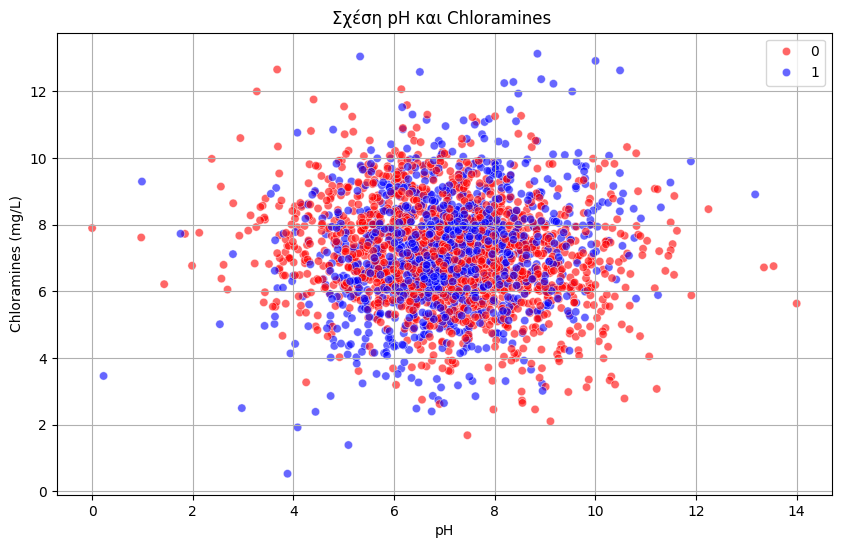

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

df_clean_ph_chlor = df.dropna(subset=["ph","Chloramines"]).copy()
#δημιουργώ το διάγραμμα
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean_ph_chlor,
    x="ph",
    y="Chloramines",
    hue="Potability",
    palette={0: "red", 1: "blue"},
    alpha=0.6
)

# Προσθήκη τίτλου και αξόνων
plt.title("Σχέση pH και Chloramines ")
plt.xlabel("pH")
plt.ylabel("Chloramines (mg/L)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
απο το διάγραμμα διασποράς παρατηρώ ότι δεν υπάρχει ξεκάθαρος διαχωρισμός των 2 τιμών καθώς βλέπουμε συχνά να πέφτει η μια πάνω στην άλλη .Βλέπουμε πάρα πολλές τιμές πάνω απο το 4 για τους chloramines άρα η οδηγία του ΠΟΥ δεν μπορεί να φανεί εδώ πέρα

In [62]:

df_without_null_values=df.fillna(df.mean(numeric_only=True))#γεμίζω τα κενά κελιά με τις μέσες τιμές
print(df_without_null_values.isna().sum())#ελέγχω ότι όντως δεν υπάρχουν κενές τιμές

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
#φτιαχνω τα 2 sets
x=df_without_null_values.drop(columns=['Potability']).to_numpy()
y=df_without_null_values['Potability'].to_numpy()
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

tree_cl=DecisionTreeClassifier(random_state=0)#
tree_cl.fit(x_train,y_train)
y_train_pred=tree_cl.predict(x_train)
y_test_pred=tree_cl.predict(x_test)

train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)


print(f"Accuracy στο training set: {train_acc:.4f}")
print(f"Accuracy στο test set: {test_acc:.4f}")



Accuracy στο training set: 1.0000
Accuracy στο test set: 0.5748


Παρατηρώ ότι το accuracy στο test set είναι πάρα πολύ χαμηλό

In [29]:

#φτιαχνω τους πίνακες με τις τιμές που μου ζητάει η άσκηση
criteria =['gini','entropy']
max_depth=[3,5,None]
min_samples_split=[2,3,5]
min_samples_leaf=[1,2]
max_features=[None,'sqrt']
cost_complexity_pruning=[0,0.01]
results=[]
exp_id=1
#δημιουργώ επαναλήψεις για κάθε τιμή
for c in criteria:
    for md in max_depth:
        for mss in min_samples_split:
            for msl in min_samples_leaf:
              for cf in max_features:
                for cs in cost_complexity_pruning:
                    tree_cl=DecisionTreeClassifier(random_state=0
                                                   ,criterion=c
                                                   ,max_depth=md
                                                   ,min_samples_split=mss
                                                   ,min_samples_leaf=msl
                                                   ,max_features=cf
                                                   ,ccp_alpha=cs
                                                   )
                    tree_cl.fit(x_train,y_train)
                    y_train_pred=tree_cl.predict(x_train)
                    y_test_pred=tree_cl.predict(x_test)

                    train_acc=accuracy_score(y_train,y_train_pred)
                    test_acc=accuracy_score(y_test,y_test_pred)
                    #τις αποθηκεύω σε έναν πίνακα
                    results.append({
                        'experiment_id':exp_id
                        ,'criterion':c
                        ,'max_depth':md
                        ,'min_samples_split':mss
                        ,'min_samples_leaf':msl
                        ,'max_features':cf
                        ,'cost_complexity_pruning':cs
                        ,'train_accuracy':train_acc
                        ,'test_accuracy':test_acc
                    })
                    exp_id+=1
                    results_df=pd.DataFrame(results)


#print(f"Accuracy στο training set: {train_acc:.4f}")
#print(f"Accuracy στο test set: {test_acc:.4f}")

In [30]:
results_df

,experiment_id,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,cost_complexity_pruning,train_accuracy,test_accuracy
0,1,gini,3.0,2,1,None,0.00,0.634104,0.632757
1,2,gini,3.0,2,1,None,0.01,0.605321,0.620549
2,3,gini,3.0,2,1,sqrt,0.00,0.630615,0.627670
3,4,gini,3.0,2,1,sqrt,0.01,0.605321,0.620549
4,5,gini,3.0,2,2,None,0.00,0.633668,0.632757
...,...,...,...,...,...,...,...,...,...
139,140,entropy,NaN,5,1,sqrt,0.01,0.620148,0.626653
140,141,entropy,NaN,5,2,None,0.00,0.962495,0.578840
141,142,entropy,NaN,5,2,None,0.01,0.620148,0.626653
142,143,entropy,NaN,5,2,sqrt,0.00,0.938945,0.600203


[Text(0.5, 0.875, 'x[4] <= 259.026\nentropy = 0.968\nsamples = 2293\nvalue = [1388, 905]'),
 Text(0.25, 0.625, 'x[2] <= 21161.408\nentropy = 0.771\nsamples = 62\nvalue = [14, 48]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 7.904\nentropy = 0.982\nsamples = 19\nvalue = [11, 8]'),
 Text(0.0625, 0.125, 'entropy = 0.837\nsamples = 15\nvalue = [11, 4]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.375, 'x[1] <= 220.901\nentropy = 0.365\nsamples = 43\nvalue = [3, 40]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.4375, 0.125, 'entropy = 0.696\nsamples = 16\nvalue = [3, 13]'),
 Text(0.75, 0.625, 'x[4] <= 387.328\nentropy = 0.961\nsamples = 2231\nvalue = [1374, 857]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 4.636\nentropy = 0.952\nsamples = 2068\nvalue = [1300, 768]'),
 Text(0.5625, 0.125, 'entropy = 0.71\nsamples = 98\nvalue = [79, 19]'),
 Text(0.6875, 0.125, 'entropy = 0.958\nsampl

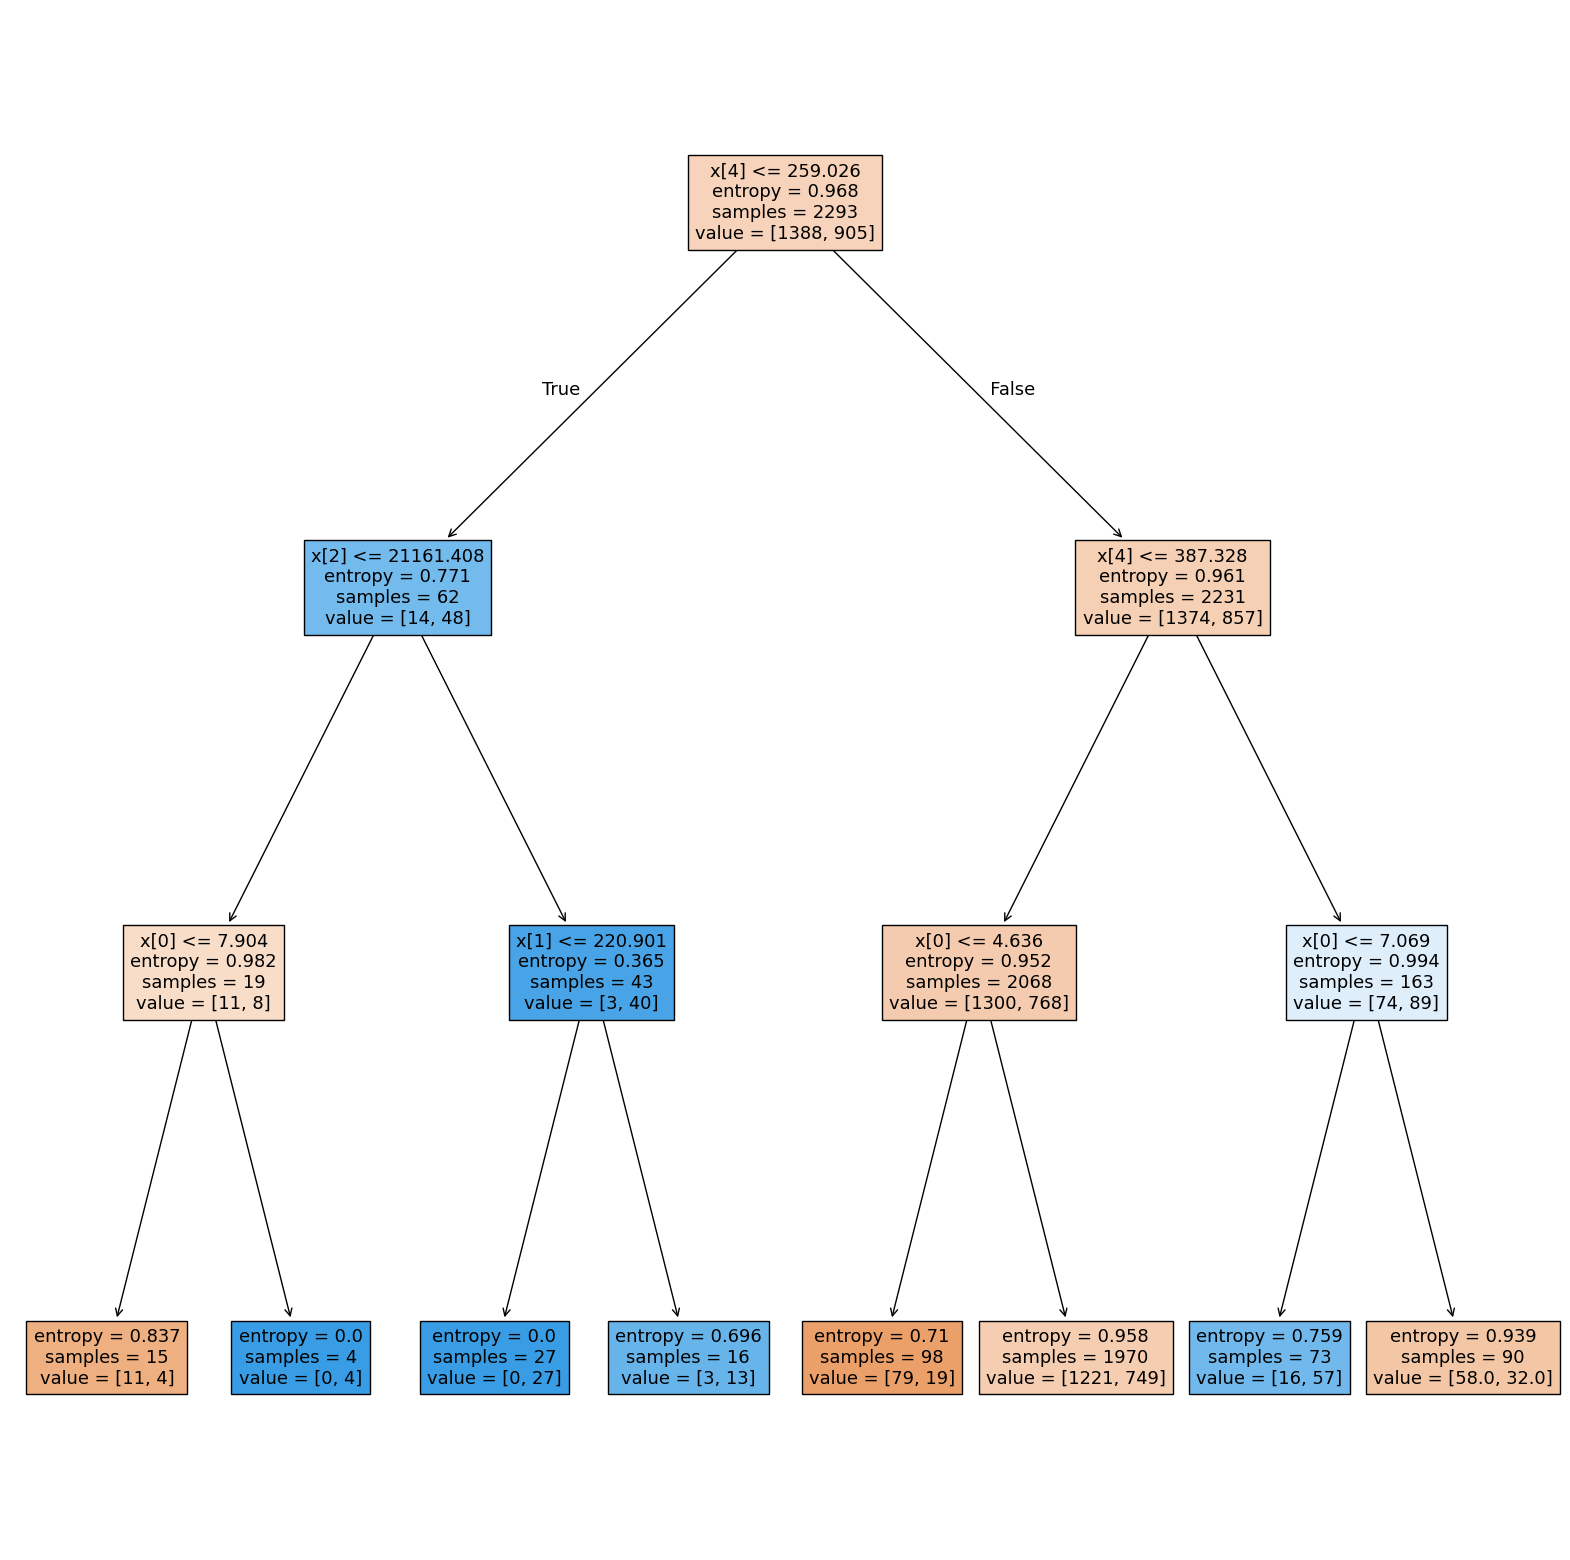

In [58]:
from sklearn import tree

#παίρνω τις τιμές για max_depth=3
br_max_depth3=(results_df.query("max_depth==3").sort_values(by=['test_accuracy'],ascending=[False]).iloc[0])
br_max_depth3
tree_cl=DecisionTreeClassifier(random_state=0
                                                   ,criterion=br_max_depth3.criterion
                                                   ,max_depth=int(br_max_depth3.max_depth)
                                                   ,min_samples_split=int(br_max_depth3.min_samples_split)
                                                   ,min_samples_leaf=int(br_max_depth3.min_samples_leaf)
                                                   ,max_features=br_max_depth3.max_features
                                                   ,ccp_alpha=br_max_depth3.cost_complexity_pruning
                                                   )
tree_cl.fit(x_train,y_train)
y_train_pred=tree_cl.predict(x_train)
y_test_pred=tree_cl.predict(x_test)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
#print(f"Accuracy στο training set: {train_acc:.4f}")
#print(f"Accuracy στο test set: {test_acc:.4f}")

plt.figure(figsize=(20,20))
tree.plot_tree(tree_cl,filled=True)


In [ ]:
Από το δέντρο δεν είναι αρκετά ευανάγνωστο το πως λειτουργεί ο έλεγχος για αυτό παρακάτω κάνω ένα print και την λίστα τιμών

In [51]:
from sklearn.tree import export_text
feature_names=df_without_null_values.drop(columns=['Potability']).columns.tolist()
feature_names
#rules_txt = export_text(tree_cl, decimals=3)
#print(rules_txt)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [ ]:
άρα τώρα βλέπουμε ότι ξεκινάει τον έλεγχο στο sulfate και την τιμή 259.026 αμα ειναι μικρότερη πάει και κάνει τον έλεγχο στο solids .ΑΝ  solids<21161 τοτε αν εχει ph <7.904 είναι πόσιμο αλλιώς δεν είναι

In [60]:

br_max_depth3=(results_df.sort_values(by=['test_accuracy'],ascending=[False]).iloc[0])
br_max_depth3
tree_cl=DecisionTreeClassifier(random_state=0
                                                   ,criterion=br_max_depth3.criterion
                                                   ,max_depth=int(br_max_depth3.max_depth)
                                                   ,min_samples_split=int(br_max_depth3.min_samples_split)
                                                   ,min_samples_leaf=int(br_max_depth3.min_samples_leaf)
                                                   ,max_features=br_max_depth3.max_features
                                                   ,ccp_alpha=br_max_depth3.cost_complexity_pruning
                                                   )
tree_cl.fit(x_train,y_train)
y_train_pred=tree_cl.predict(x_train)
y_test_pred=tree_cl.predict(x_test)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
importances=tree_cl.feature_importances_
features_importances=pd.DataFrame({
    'feature':feature_names,
    'importance':importances
})
features_importances


,feature,importance
0,ph,0.244768
1,Hardness,0.091392
2,Solids,0.086400
3,Chloramines,0.191956
4,Sulfate,0.298956
5,Conductivity,0.012864
6,Organic_carbon,0.000000
7,Trihalomethanes,0.053536
8,Turbidity,0.020127


In [ ]:
όπως είδαμε και στο δέντρο το sulfate είναι σημαντικό χαρακτηριστικό και έχει την πιο μεγάλη τιμή .Τα 5 πιο σημαντικά είναι Sulfate,ph,chloramines,hardness,solids